## Importação das bibliotecas

In [1]:
import os

import act
import matplotlib.pyplot as plt

# First import the NetCDF4 package
from netCDF4 import Dataset
from netCDF4 import MFDataset

# Next import plotting functions
from pylab import *

from datetime import date, datetime

## Dados de acesso ao https://adc.arm.gov/armlive/

In [2]:
# Place your username and token here
my_arm_username = 'LourencoCavalcante' 
api_access_token = '311d84bc76093a97' #https://adc.arm.gov/armlive/register


## Vamos definir o datastream e o período dos dados que quremos baixar

In [3]:
#Site: 
datastream = 'cormwrpM1.b1' #No momento do dowinload, será criado um diretório com este mesmo nome, para onde os dados ARM serão baixados,
date_start = '2018-09-23' 
date_end = '2019-04-09'


## Agora já podemos baixar os dados ARM do datastream escolhido. 

In [ ]:
# Download MWR data on ARM
act.discovery.download_data(my_arm_username, api_access_token, datastream, date_start, date_end)

In [ ]:
#Create directores for output plot figures
dir = (f'./{datastream}/output/figures')  
os.makedirs(dir)
#os.mkdir(dir)

In [76]:
data = datetime.today()
hoje = data.strftime('%d-%m-%Y')
hora = data.strftime('%H-%M-%S')


#Access directores files downloaded
mwr_mp3000a_ds = act.io.armfiles.read_netcdf(f'./{datastream}/{datastream}.20190317*.cdf')
#ceil_ds = act.io.armfiles.read_netcdf(f'./{datastream}/{datastream}.201903*.cdf')


#print(mwr_mp3000a_ds.variables)

## Vamos visualizar as variáveis

In [77]:
#print(mwr_mp3000a_ds.variables.keys())
print(mwr_mp3000a_ds.variables.keys())

KeysView(Frozen({'base_time': <xarray.Variable ()>
array('2019-03-17T00:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    string:     2019-03-17 00:00:00 0:00
    long_name:  Base time in Epoch, 'time_offset': <xarray.Variable (time: 1430)>
array(['2019-03-17T00:09:19.000000000', '2019-03-17T00:10:18.000000000',
       '2019-03-17T00:11:18.000000000', ...,
       '2019-03-17T23:56:18.000000000', '2019-03-17T23:57:18.000000000',
       '2019-03-17T23:58:18.000000000'], dtype='datetime64[ns]')
Attributes:
    long_name:  Time offset from base_time, 'time': <xarray.IndexVariable 'time' (time: 1430)>
array(['2019-03-17T00:09:19.000000000', '2019-03-17T00:10:18.000000000',
       '2019-03-17T00:11:18.000000000', ..., '2019-03-17T23:56:18.000000000',
       '2019-03-17T23:57:18.000000000', '2019-03-17T23:58:18.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:  Time offset from midnight, 'qc_time': <xarray.Variable (time: 1430)>
dask.array<open_dataset-90472ba04e8c

# Plot dos gráficos, gera e salva as figuras

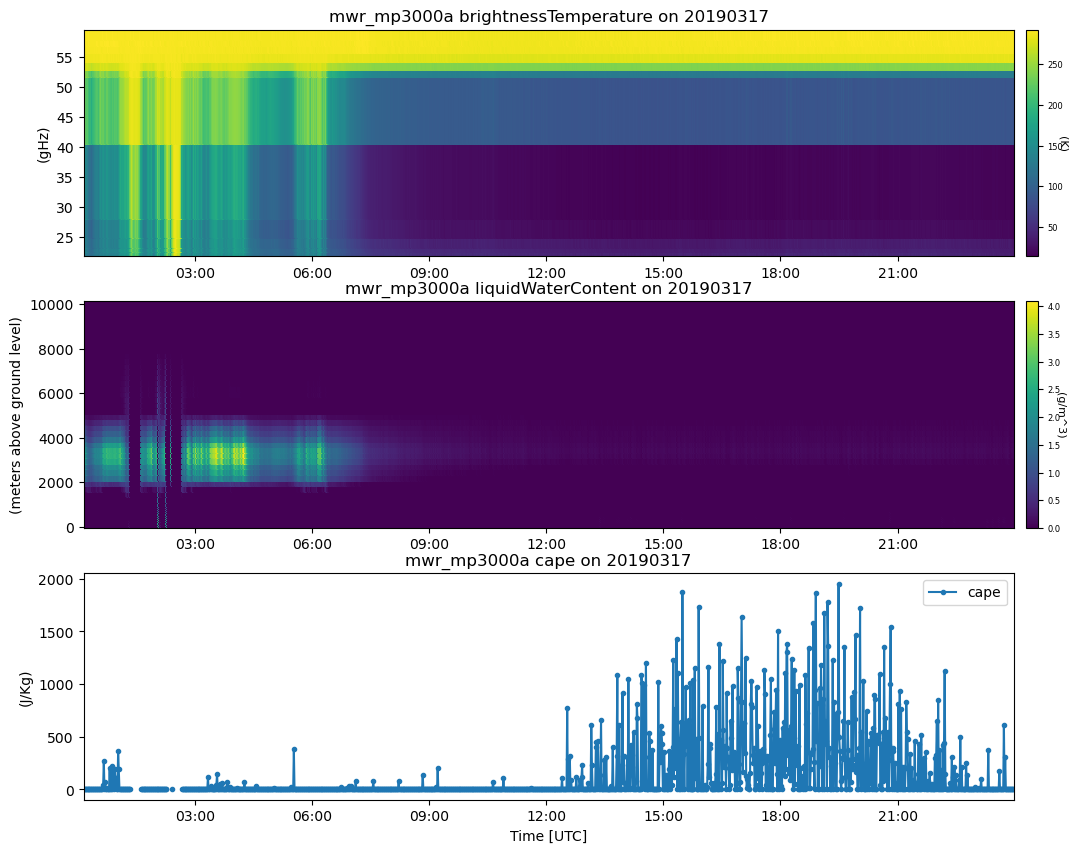

In [78]:
# Create a TimeSeriesDisplay object
#mwr_mp3000a_ds = mwr_mp3000a_ds.resample(time='1min').nearest()
#ceil_ds = ceil_ds.resample(time='1min').nearest()

display = act.plotting.TimeSeriesDisplay(
   #{'mwr_mp3000a': mwr_mp3000a_ds, 'mwr_mp3000a_': ceil_ds},
   {'mwr_mp3000a': mwr_mp3000a_ds},
   subplot_shape=(3,), figsize=(12,10)
)

# Plot data
display.plot('brightnessTemperature', dsname='mwr_mp3000a' , set_shading='nearest',label='brightnessTemperature',
   subplot_index=(0,))
display.plot('liquidWaterContent', dsname='mwr_mp3000a', set_shading='nearest',label='liquidWaterContent',
   subplot_index=(1,))
#display.day_night_background('cormwrpM1.b1', subplot_index=(1,))

display.plot('cape', dsname='mwr_mp3000a', set_shading='nearest', label='cape',
   subplot_index=(2,))


plt.savefig(f'{datastream}/output/figures/{datastream}_{hoje}_{hora}.png')
plt.show()


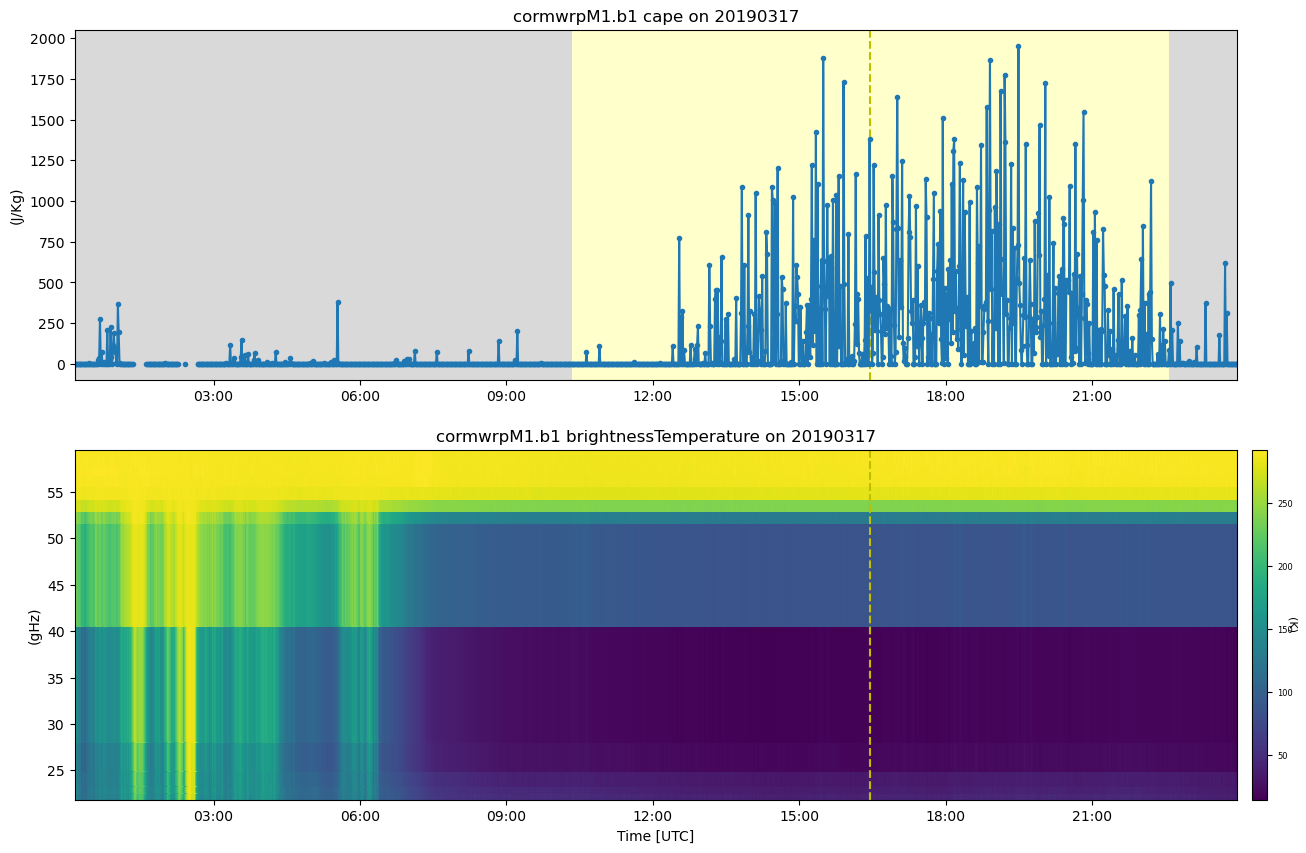

In [79]:
# You can use tuples if the datasets in the tuple contain a
# datastream attribute. This is required in all ARM datasets.
display = act.plotting.TimeSeriesDisplay((mwr_mp3000a_ds), subplot_shape=(2,), figsize=(15, 10))
display.plot('cape', 'cormwrpM1.b1', subplot_index=(0,))
display.day_night_background('cormwrpM1.b1', subplot_index=(0,))
display.plot('brightnessTemperature', 'cormwrpM1.b1', subplot_index=(1,))
display.day_night_background('cormwrpM1.b1', subplot_index=(1,))
plt.show()

REFERENCES:

@misc{zhang, title={MWR Retrievals (MWRRET1LILJCLOU)}, DOI={10.5439/1027369}, journal={Atmospheric Radiation Measurement (ARM) user facility}, author={Zhang, Damao} }